In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import warnings
from lmfit.models import PseudoVoigtModel, GaussianModel
from jupyterthemes import jtplot
from matplotlib.colors import Normalize

In [119]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

In [120]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'O1s_sub' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 5.20,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na1s' : 1.685, 'Cl_2s' : 0.37, 'Ru3d' : 4.273,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Cl2p_(2)' : 0.891, 'Cl2p_(3)' : 0.891, 'Si2p': 0.339})

asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69, }

asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}
mfps = {'Cu2p' : 1.86, 'In3d': 3.05, 'Si2p': 3.8}

In [4]:
regss = ['O1s', 'Si2p', 'N1s', 'C1s', 'In3d', 'Ba3d5/2', 'Cl2p', 'Ru3d5/2', 'Si2s']
asfScof = {}
for r in regss:
    asfScof.update(search_asf(r))

In [5]:
asfScof

{'O1s': 0.6613995485327314,
 'Si2p': 0.18442437923250563,
 'N1s': 0.4063205417607223,
 'C1s': 0.2257336343115124,
 'In3d': 5.088036117381489,
 'Ba3d5/2': 5.832957110609481,
 'Cl2p': 0.5158013544018059,
 'Ru3d5/2': 1.6681715575620766,
 'Si2s': 0.21557562076749434}

Ion drift velocity: 270 cm/s, drifts of 1-100 cm take 3.7 - 370 ms.

Electron drift velocity: 0.8 mm/µs, drifts of 100-1 cm take 1250 - 10 µs

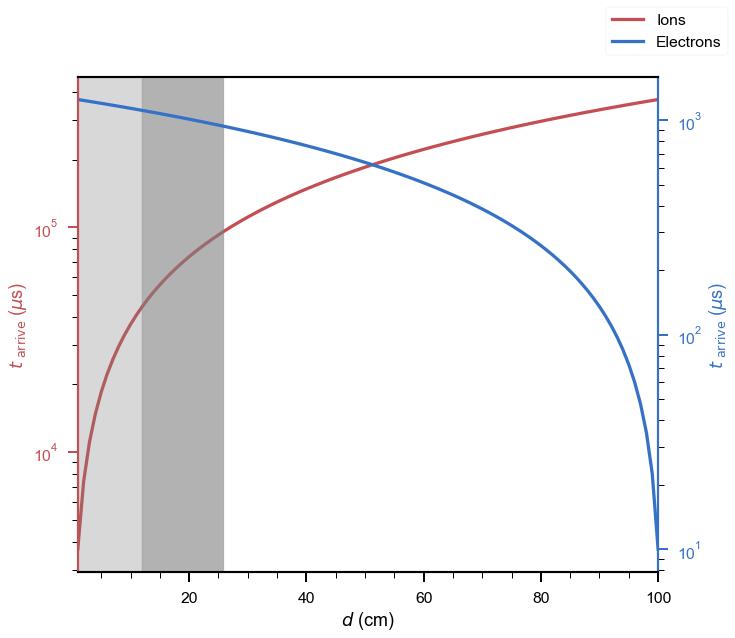

In [134]:
d = np.linspace(1, 100, 100)
ti = np.linspace(3.7e3, 370e3, 100)
te = np.linspace(1250, 10, 100)

cutte = 50e3 # Assuming resconstruction time 50 ms
poscut = np.where(te + cutte >= ti)[0][-1]

cutte2 = 10e4 # Assuming resconstruction time 100 ms
poscut2 = np.where(te + cutte2 >= ti)[0][-1]

fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax.plot(d, ti, 'r', label='Ions')
ax2.plot(d, te, 'b', label='Electrons')
ax.set(xlim = (1, 100), yscale='log', xlabel='$d$ (cm)', ylabel='$t_{\mathrm{\ arrive}}$ ($\mu$s)')
ax2.set(yscale='log', xlabel='$d$ (cm)', ylabel='$t_{\mathrm{\ arrive}}$ ($\mu$s)')
fig.legend()

ylim = ax2.get_ylim()

ax2.fill_between(x=d[:poscut], y1=0, y2=ylim[1], color='gray', alpha=0.3) # y2 = te[:poscut]
ax2.fill_between(x=d[poscut-1:poscut2], y1=0, y2=ylim[1], color='gray', alpha=0.6)
ax2.set(ylim = ylim)

# ax.text(x=2, y=1e5, s='$t_{rec}$ = 50 ms', fontsize = 11 )
# ax.text(x=12, y=2e5, s='$t_{rec}$ = 100 ms', fontsize = 13 )

ax2.spines['left'].set_color('r')
ax2.spines['right'].set_color('b')
ax.yaxis.label.set_color('r')
ax2.yaxis.label.set_color('b')
ax.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')

fig.savefig('/Users/pabloherrero/Nextcloud/thesis/ch4/ion_arrival_time.png', dpi=500)

In [137]:
d[poscut2], d[poscut]

(27.0, 13.0)

# Import data

In [339]:
filehd = '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/20220825_ITO_G2SL_AYN05_subl_2h.xy'
xpsov = import_group_xp(filehd)

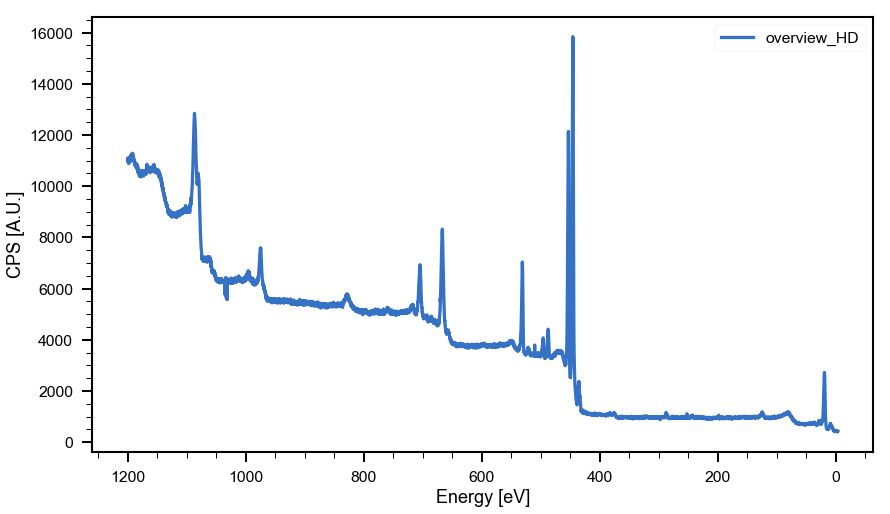

In [344]:
plt.figure(figsize=(14,8))
plot_region(xpsov[1], 'overview')


## Data G2-SL sublimated on ITO

In [376]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/'
files = glob.glob(path+'/**/**/*.sxy')
files.sort()
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220824_ITO_G2SL_AYN04_clean.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220824_ITO_G2SL_AYN04_clean_plasma1h.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220825_ITO_G2SL_AYN04_subl_6h.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/proc/20220825_ITO_G2SL_AYN05_clean.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/proc/20220825_ITO_G2SL_AYN05_subl_2h.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/proc/20220826_ITO_G2SL_AYN05_subl_2h_Ba_2min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_31_ITO_G2SL_BOLD_128_A2_48h/proc/20220831_ITO_G2SL_BOLD128_A2_48h.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_31_ITO_G2SL_BOLD_128_A2_48h/proc/20220831_ITO_G

In [377]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/'
files = glob.glob(path+'*/**/*.sxy')
files.sort()
files

g2sl = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220824_ITO_G2SL_AYN04_clean.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220824_ITO_G2SL_AYN04_clean_plasma1h.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220825_ITO_G2SL_AYN04_subl_6h.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/proc/20220825_ITO_G2SL_AYN05_clean.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/proc/20220825_ITO_G2SL_AYN05_subl_2h.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pa

### Names and colors

In [383]:
names = ['04-ITO clean', '04-ITO plasma', '04-G2-SL 6h',
         '05-ITO clean', '05-G2-SL 2h', '05-BaCl$_2$ 2min/G2-SL 2h', 'BOLD_128_48h', 'BaCl$_2$ 1min BOLD_128_48h']
cols = ['b', 'g', 'r', 'y', 'm', 'c' ,'k', 'green']
for c, n, xp in zip (cols, names, g2sl):
    xp.color = c
    xp.name = n

# Plot regions G2

## Ba/G2/ITO

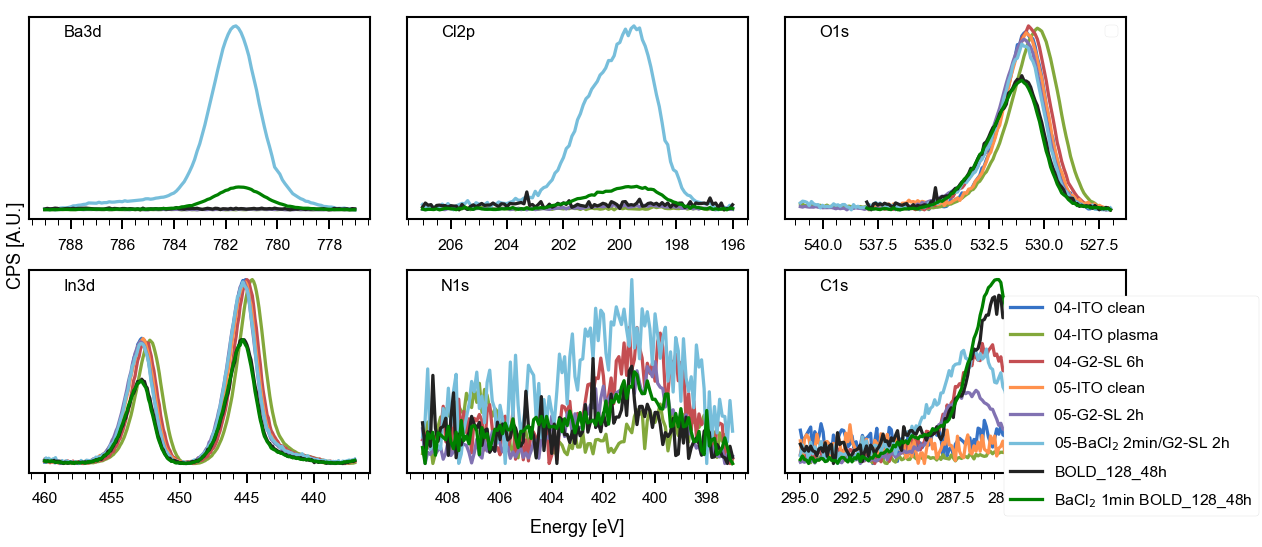

In [384]:
regs = ['Ba3d', 'Cl2p', 'O1s', 'In3d',  'N1s', 'C1s',]
ax = plot_xp_regions(g2sl, regs, ncols=3);
ax[0,0].invert_xaxis()
ax[0,1].invert_xaxis()
# ax[1,0].invert_xaxis()

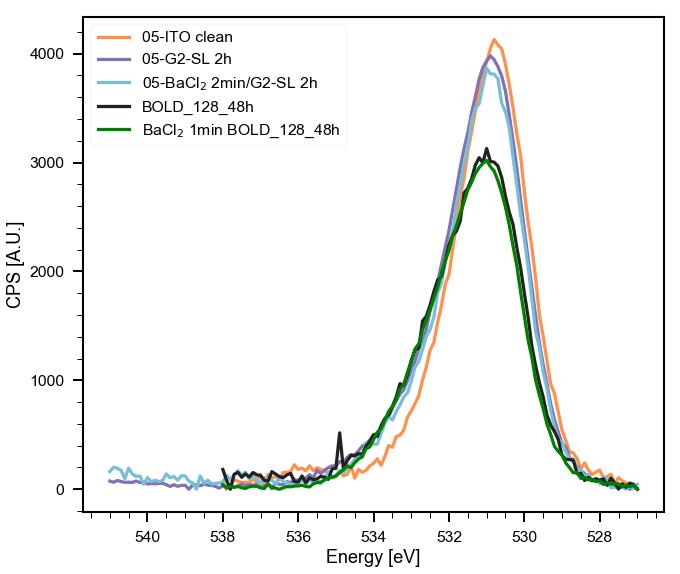

In [386]:
for xp in g2sl[3:]:
    plot_region(xp, 'O1s')
# plt.gca().invert_xaxis()

In [387]:
for xp in g2sl:
    drop_region(xp, 'overview')

In [388]:
g2sl[0].dfx.columns.levels

FrozenList([['C1s', 'In3d', 'O1s', 'Sn3d', 'C1s_bg', 'O1s_bg', 'In3d_bg'], ['counts', 'energy']])

In [174]:
def drop_region(xp, region):
    xp.dfx.drop(region, level=0, axis=1, inplace=True)
    mi = xp.dfx.columns.remove_unused_levels()    
    xp.dfx.columns = mi

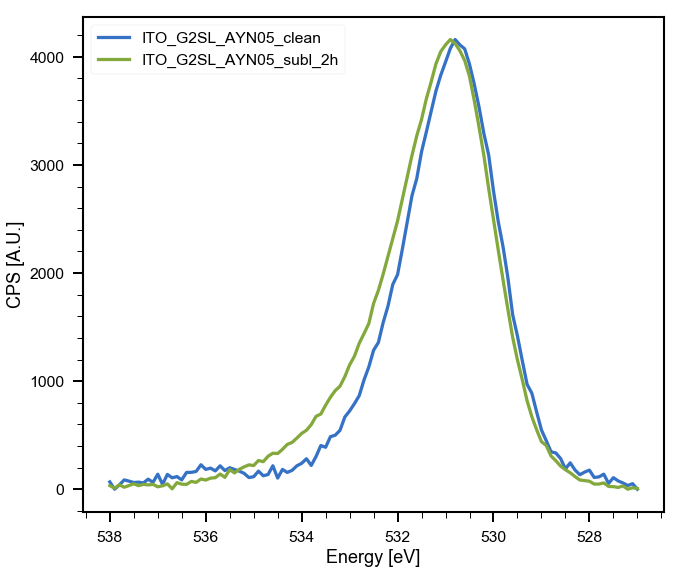

In [328]:
for xp in scaled[3:5]:
    plot_region(xp, 'O1s')
plt.gca().invert_xaxis()

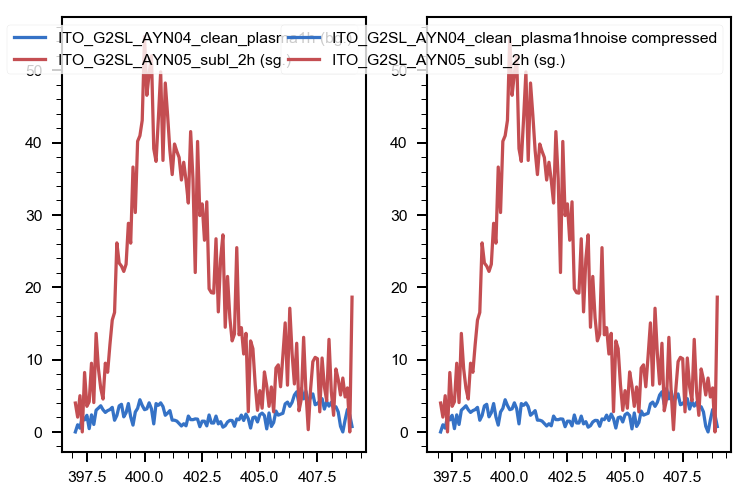

In [389]:
compress_noisy_region(scaled[1], scaled[4], 'N1s', inplace=True);
scaled[1].color = 'b'

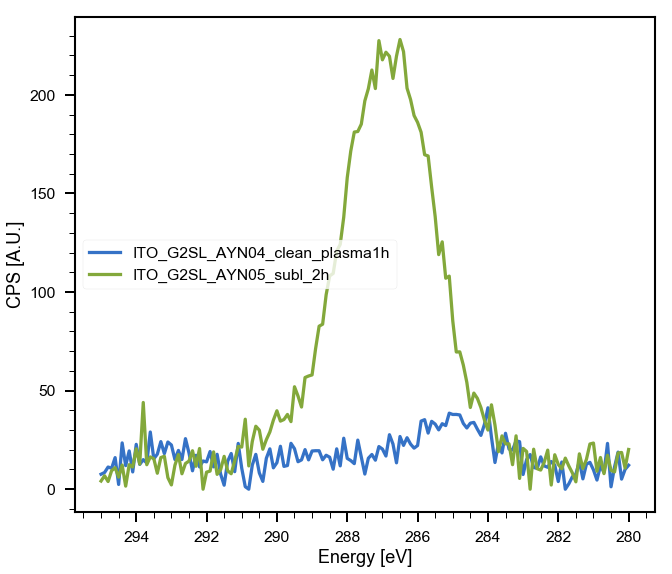

In [349]:
for xp in [scaled[1], scaled[4]]:
    try:
        plot_region(xp, 'C1s')
    except KeyError: pass
plt.gca().invert_xaxis()

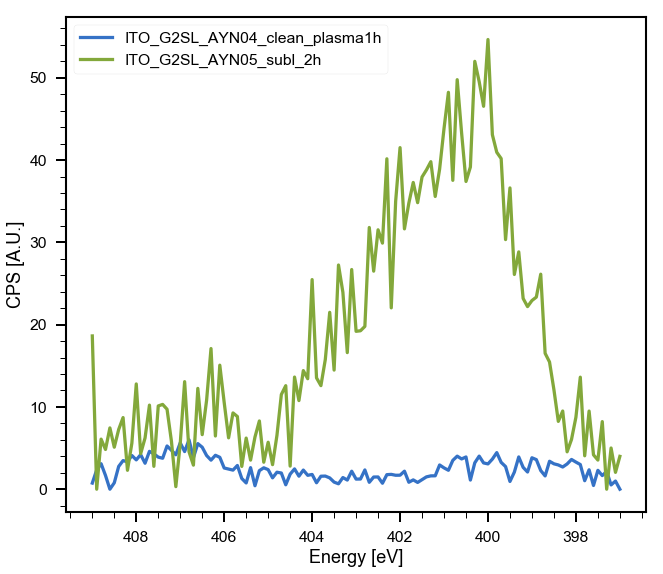

In [362]:
for xp in [scaled[1], scaled[4]]:
    try:
        plot_region(xp, 'N1s')
    except KeyError: pass
plt.gca().invert_xaxis()

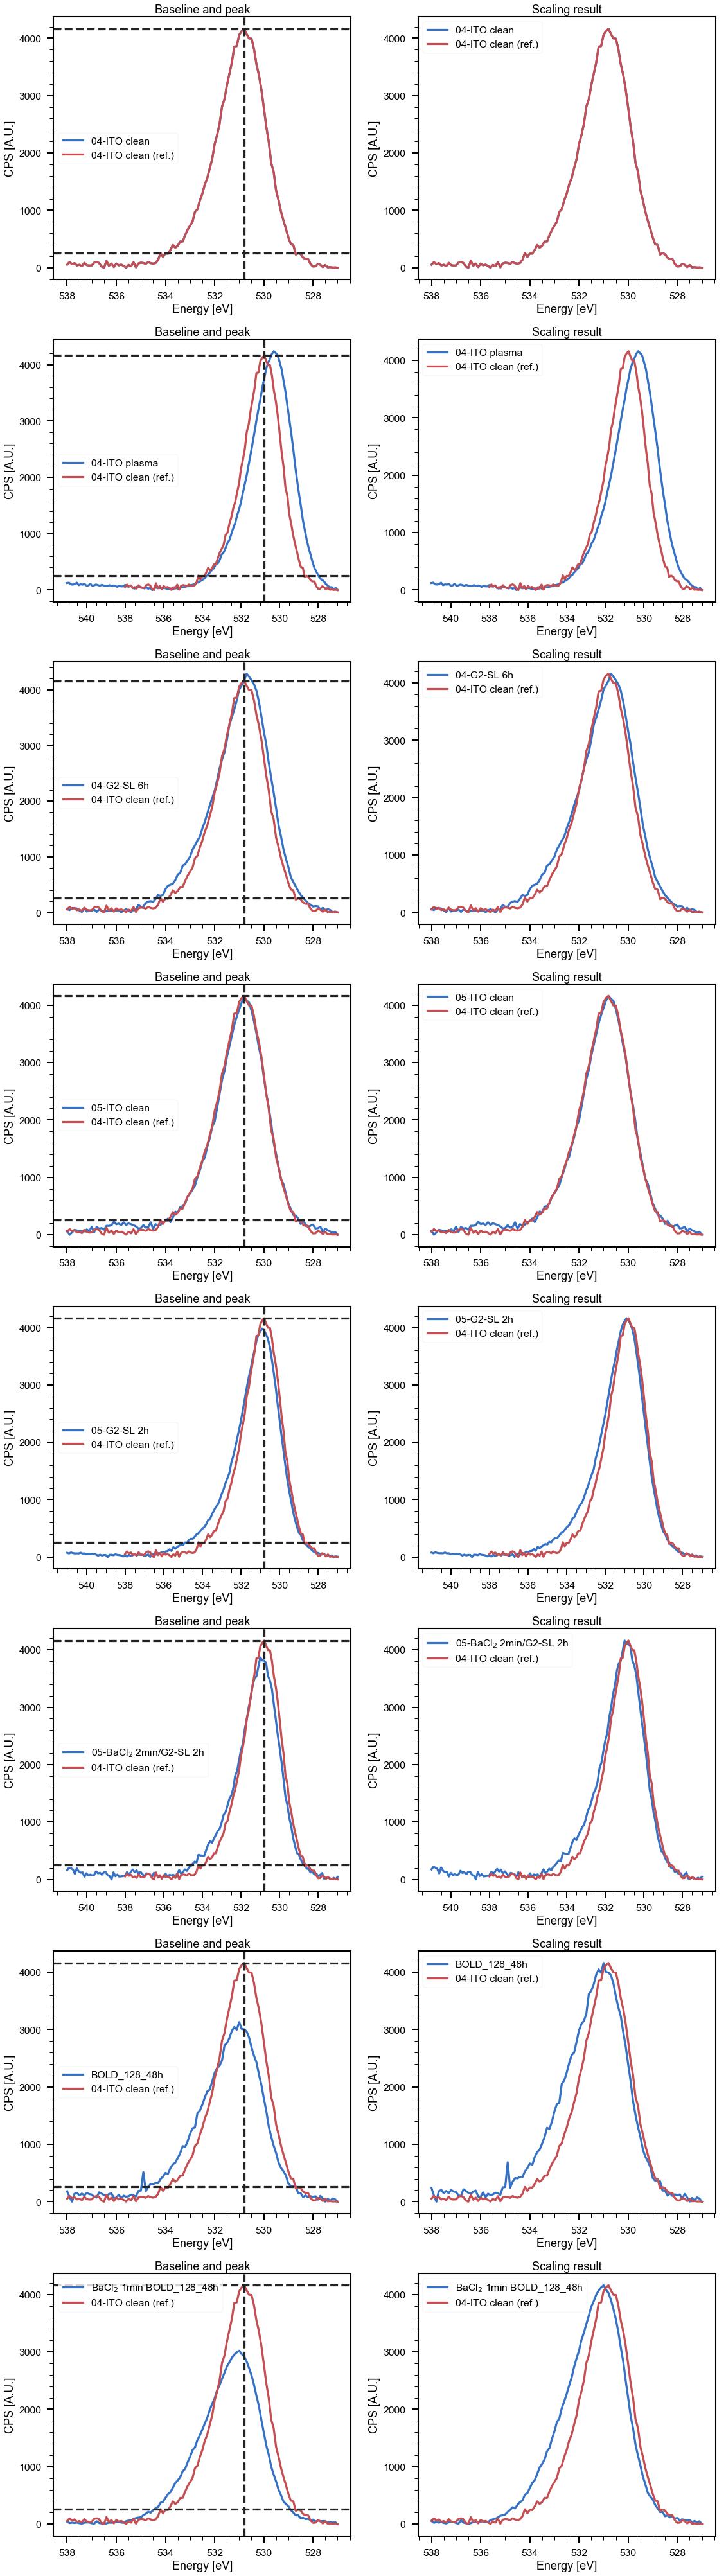

In [390]:
scaled = scale_and_plot_spectra(g2sl, region='O1s')

In [273]:
[xp.name for xp in scaled]

['ITO_G2SL_AYN04_clean',
 'ITO_G2SL_AYN04_clean_plasma1h',
 'ITO_G2SL_AYN04_subl_6h',
 'ITO_G2SL_AYN05_clean',
 'ITO_G2SL_AYN05_subl_2h',
 'ITO_G2SL_AYN05_subl_2h_Ba_2min']

In [391]:
for xp in scaled[1:]:
    trim_spectra(xp, scaled[0], region='O1s', inplace=True)

In [458]:
sub=[subtract_ref_region(scaled[2], scaled[1], region='O1s')]
for xp in scaled[4:]:
    subscaled = subtract_ref_region(xp, scaled[3], region='O1s')
    sub.append(subscaled)

for xp in sub:
    crop_spectrum(xp, region='O1s', edw=530.3, inplace=True)

In [459]:
sub[1].color = 'g'
sub[2].color = 'r'

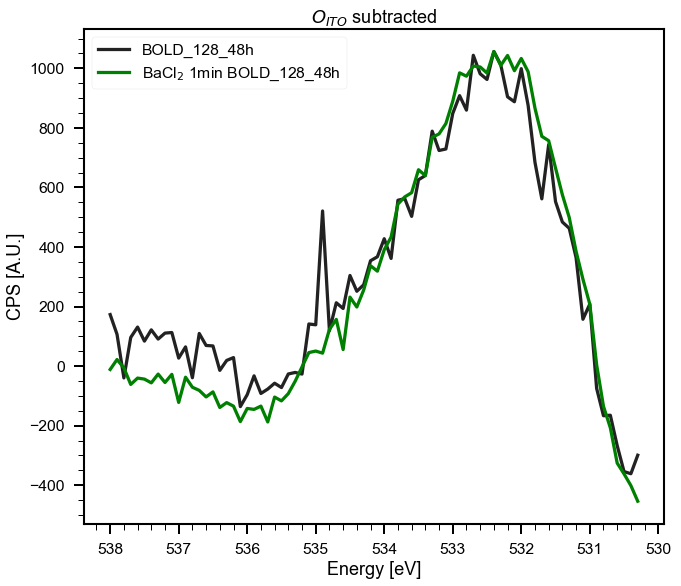

In [460]:
for xp in sub[3:]:
    plot_region(xp, 'O1s')
plt.gca().set(title='$O_{ITO}$ subtracted')
plt.gca().invert_xaxis()

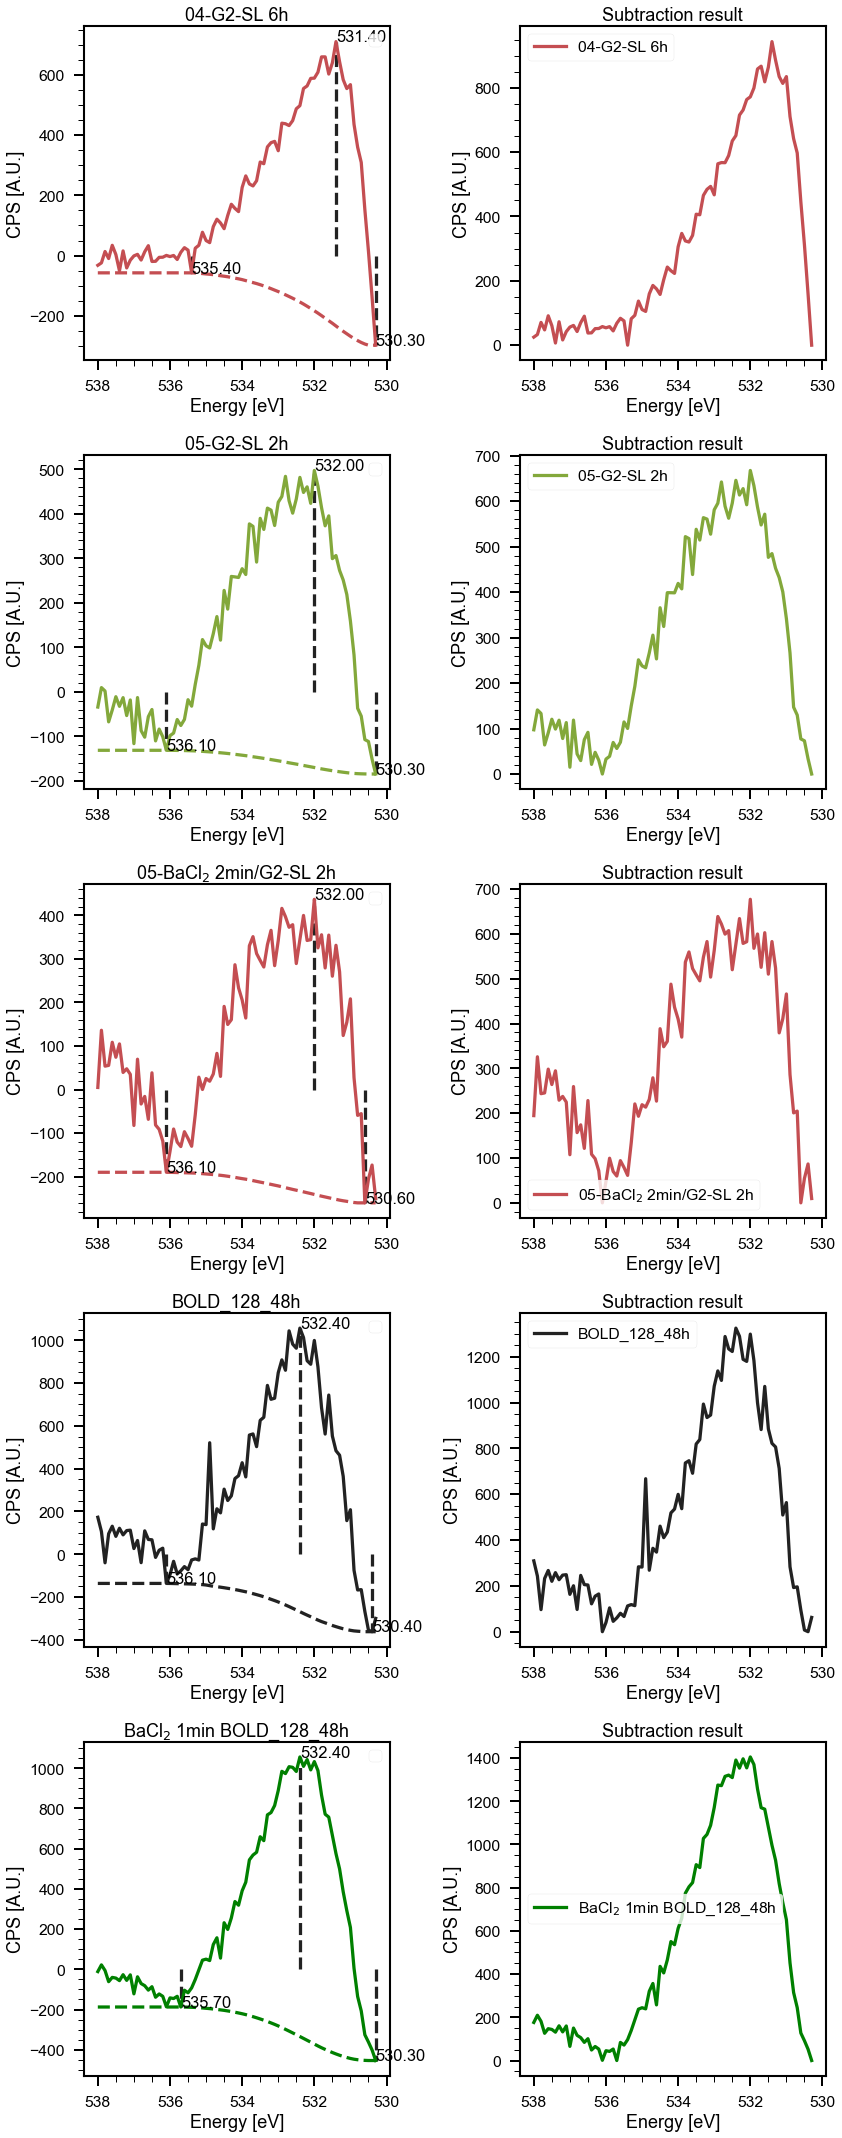

In [461]:
sub = region_bg_subtract(sub, 'O1s')

# Stoichiometry

### Subtract O$_{ITO}$

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c299dda20>,
      dtype=object)

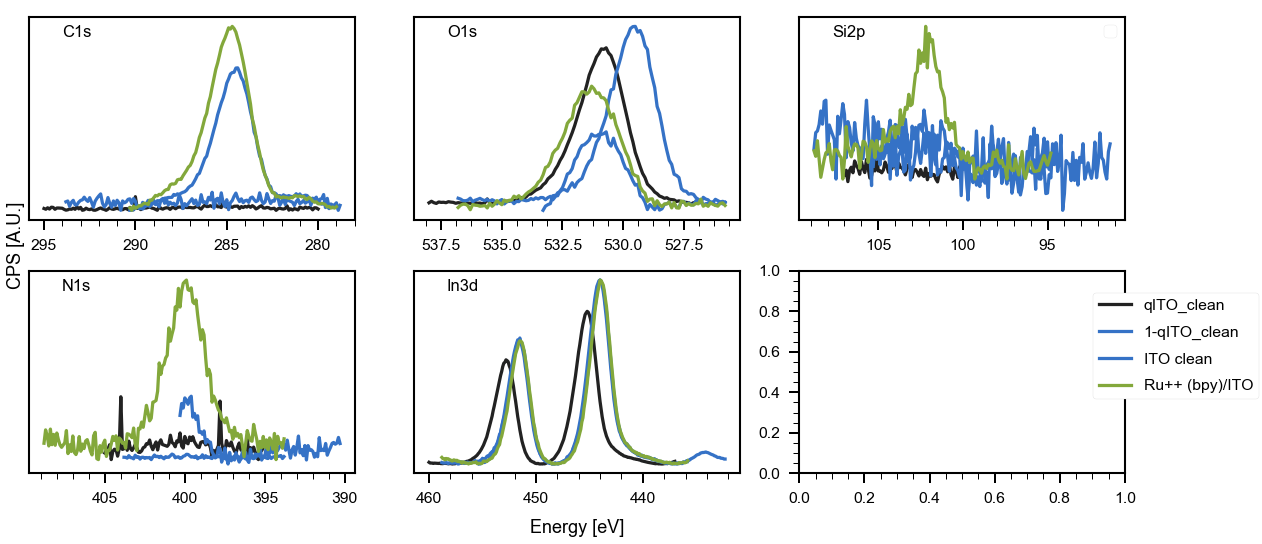

In [40]:
plot_xp_regions([itoClean, itoClean2] + ruaptes, regs)

### Batch Integration

In [462]:
asfScof['Ba3d'] = 5.8329

'Ba3d' region does not exist in 04-G2-SL 6h
'Cl2p' region does not exist in 04-G2-SL 6h


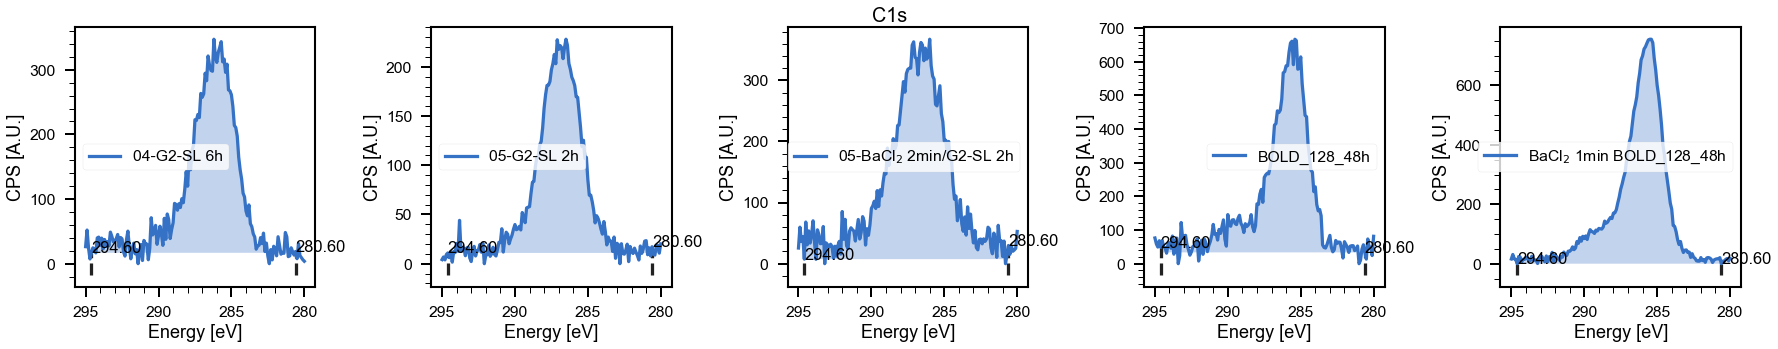

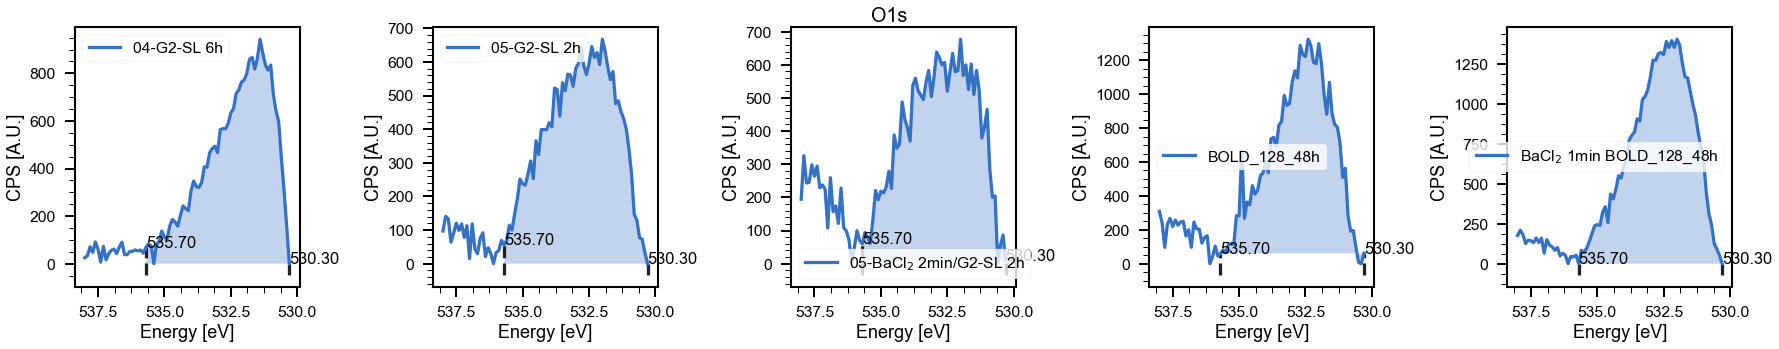

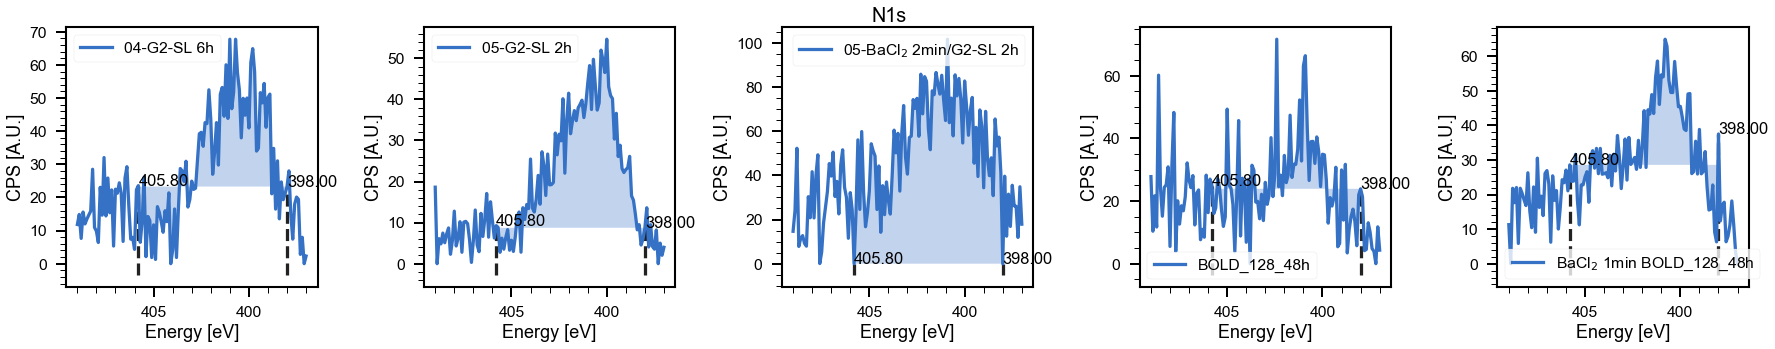

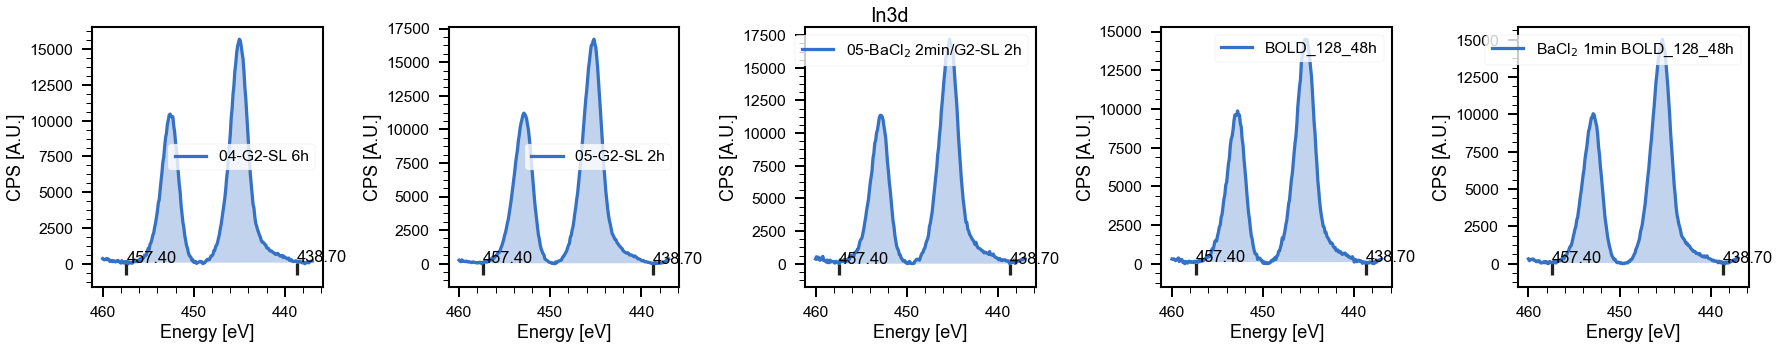

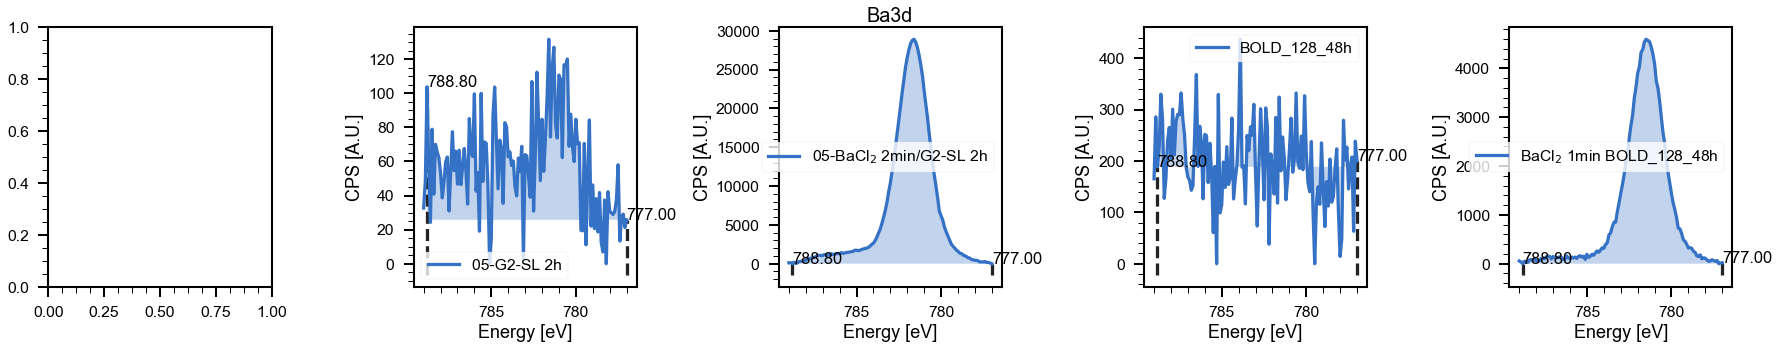

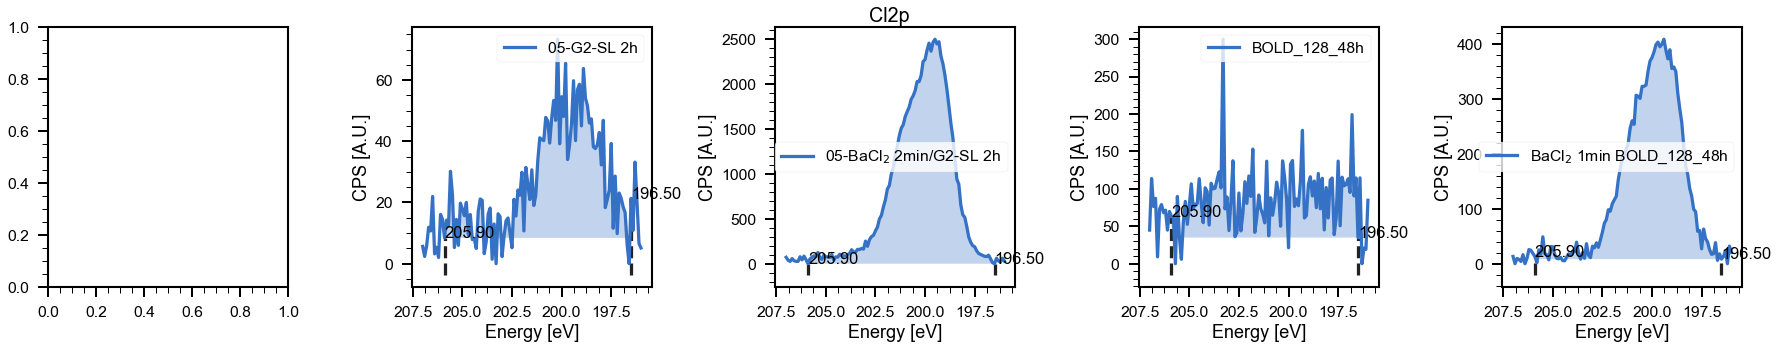

In [463]:
regs = ['C1s', 'O1s', 'N1s', 'In3d', 'Ba3d', 'Cl2p']

for r in regs:
    integrateRegions(sub, r, asfScof)

In [464]:
region = 'Si2p'

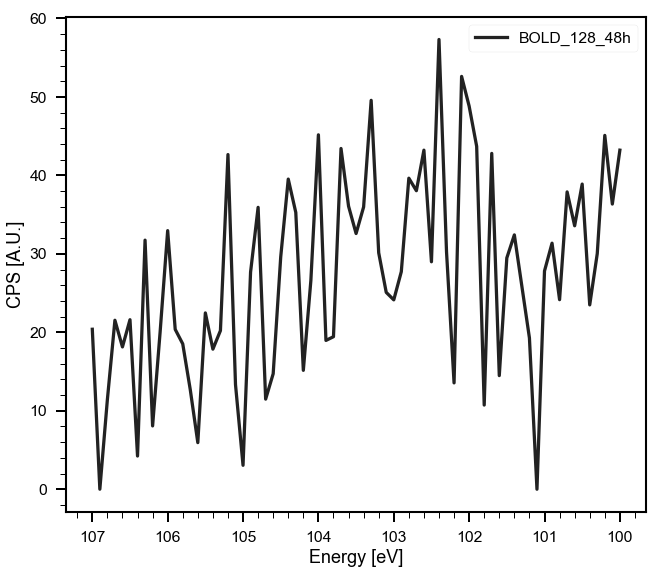

In [465]:
plot_region(sub[3], region)

[149.4897338865904,
 126.99338455641143,
 803.0958645272314,
 166.16032564137686,
 255.36605253860813]

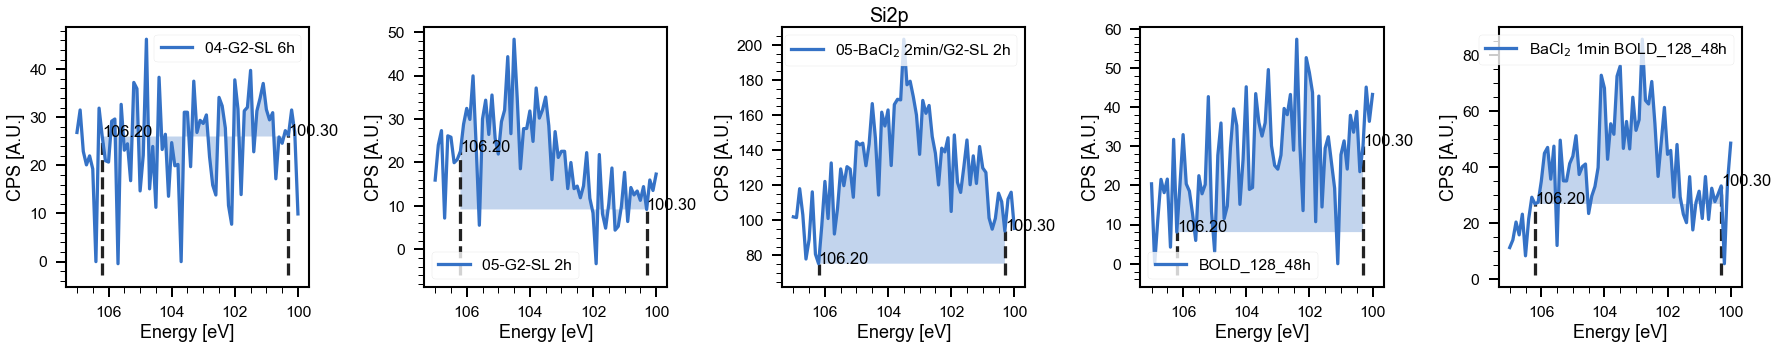

In [466]:
integrateRegions(sub, region, asfScof)

### Results

In [476]:
asfScof['N1s'], asfScof['Si2p']

(0.4063205417607223, 0.18442437923250563)

In [240]:
asf['N1s'] / asf['C1s']

1.6114864864864864

In [400]:
a = {'C1s': 12+6+6+5+2+1+3, 'N1s': 4, 'Si2p': 1, 'O1s': 9, 'Ba3d': 1e-10, 'Cl2p': 1e-10, 'G2': 1, 'Na1s': 1e-10, 'Ru3p': 1e-10}
stog2 = XPS_experiment(name='Sto. G2-SL', area=a)


In [243]:
a['C1s']

35

In [307]:
num = ['C1s', 'O1s', 'C1s']
denom = ['O1s', 'N1s','N1s']
display_stoichiometry(sub+[stog2], num, denom)

In [468]:
num = ['C1s', 'O1s', 'C1s', 'Si2p', 'Si2p']
denom = ['O1s', 'N1s','N1s', 'N1s', 'C1s']
display_stoichiometry(sub+[stog2], num, denom)

In [402]:
make_stoichometry_table(sub+[stog2], num, denom)

Experiment	C/O	O/N	C/N	
04-G2-SL 6h	1.64 	 6.08 	 9.98 	 
05-G2-SL 2h	1.20 	 6.85 	 8.22 	 
05-BaCl$_2$ 2min/G2-SL 2h	2.35 	 3.05 	 7.19 	 
BOLD_128_48h	2.02 	 10.76 	 21.77 	 
BaCl$_2$ 1min BOLD_128_48h	1.78 	 9.17 	 16.35 	 
Sto. G2-SL	3.89 	 2.25 	 8.75 	 


In [403]:
for xp in sub:
    xp.area['G2'] = xp.area['N1s'] / 4
#     xp.area['G2'] = xp.area['C1s'] / 35  

In [310]:
for xp in sub:
#     xp.area['G2'] = xp.area['N1s'] / 4
    xp.area['G2'] = xp.area['C1s'] / 35  

In [405]:
num = ['Ba3d', 'Cl2p']
denom = ['G2','Ba3d']
display_stoichiometry([sub[2], sub[4]], num, denom)

In [311]:
num = ['Ba3d', 'Cl2p']
denom = ['G2','Ba3d']
display_stoichiometry(sub, num, denom)

# Coverage

In [406]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/'
files = glob.glob(path+'*/**/*.uxy')
files.sort()
files

unscaled = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220824_ITO_G2SL_AYN04_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220824_ITO_G2SL_AYN04_clean_plasma1h.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_24_ITO_G2SL_subl6h_AYN_04/proc/20220825_ITO_G2SL_AYN04_subl_6h.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/proc/20220825_ITO_G2SL_AYN05_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_G2SL/2022_08_25_ITO_G2SL_subl2h_AYN_05/proc/20220825_ITO_G2SL_AYN05_subl_2h.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pa

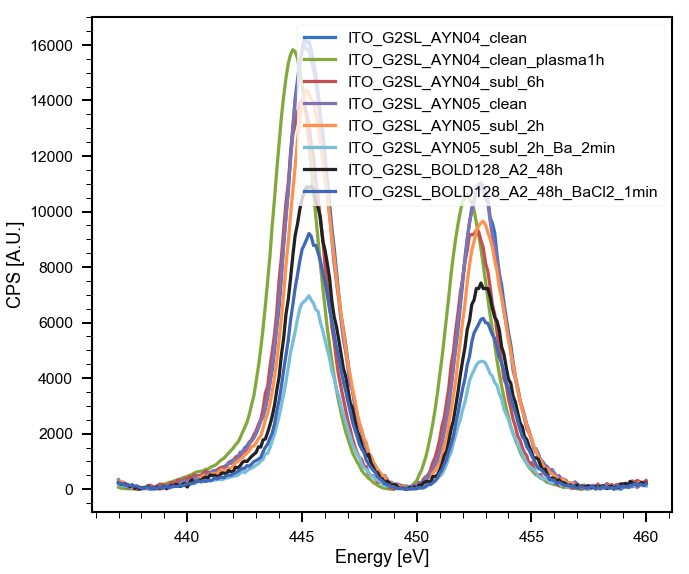

In [407]:
region = 'In3d'
for xp in unscaled:
    plot_region(xp, region)

In [409]:
inds = [[2, 1], [4, 3], [6, 3]]
arrange_coverages(unscaled, inds, r_ml=1.1,
                  region='In3d', mfp=3.05, takeoff=10)

matrix([[0.437851  , 0.00245199],
        [0.33421915, 0.00181631],
        [1.01933324, 0.00595351]])

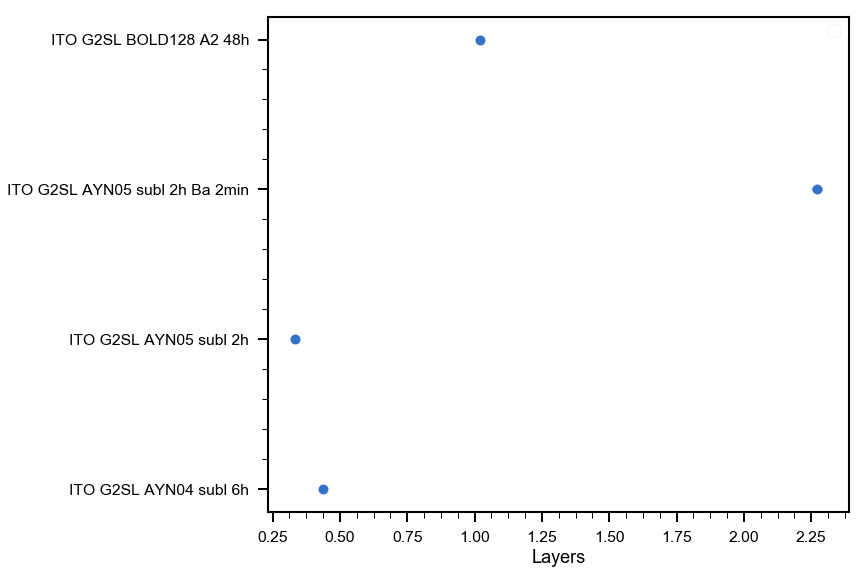

In [410]:
plot_coverages(unscaled)

# Compare C 1s

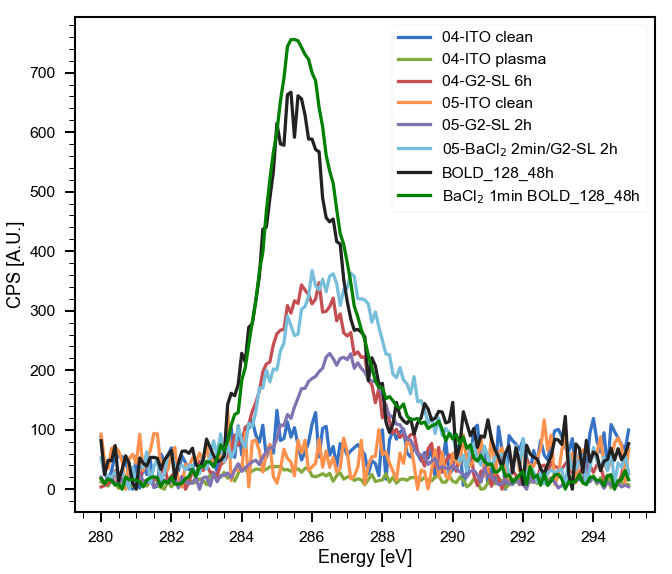

In [414]:
for xp in scaled:
    plot_region(xp, 'C1s') 

In [424]:
norm = [normalise_dfx(xp) for xp in [scaled[2], scaled[4], scaled[7]]]

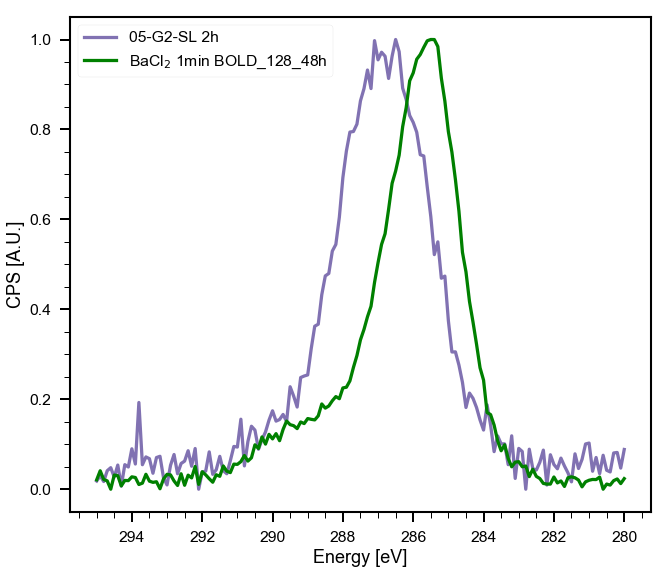

In [430]:
# plot_region(norm[0], 'C1s')
plot_region(norm[1], 'C1s')
plot_region(norm[2], 'C1s')

plt.gca().invert_xaxis()

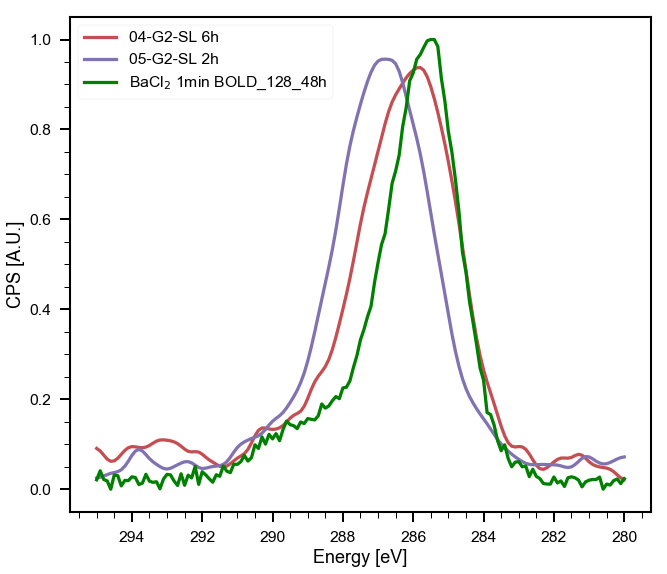

In [429]:
plot_region(gaussian_smooth(norm[0], 'C1s'), 'C1s')
plot_region(gaussian_smooth(norm[1], 'C1s'), 'C1s')
plot_region(norm[2], 'C1s')

# plt.gca().invert_xaxis()

# Si 2p

In [439]:
crop_spectrum(scaled[7], 'Si2p', edw=100, inplace=True)
crop_spectrum(scaled[6], 'Si2p', edw=100, inplace=True);

In [449]:
trim_spectra(scaled[7], scaled[6], 'Si2p', inplace=True);


In [446]:
for xp in scaled[:6]:
    try:
        trim_spectra(xp, scaled[6], 'Si2p', inplace=True)
    except KeyError: pass

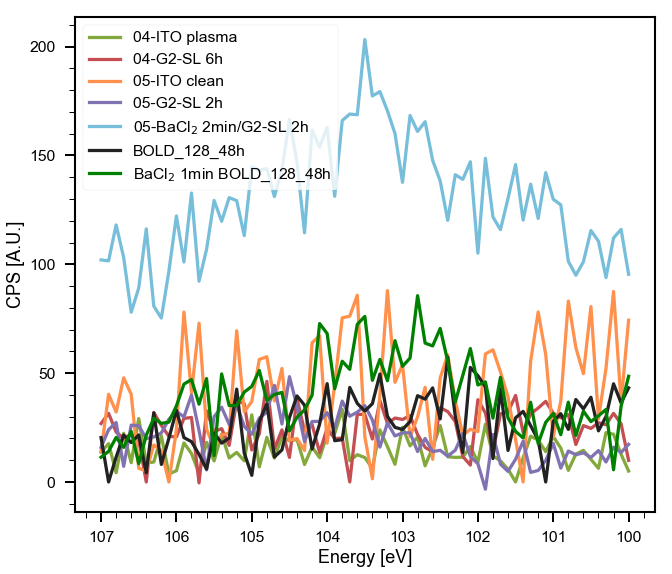

In [450]:
for xp in scaled:
    try:
        plot_region(xp, 'Si2p')
    except KeyError: pass

In [ ]:
integrateRegions(sc)

# Au (111) spectrum

In [122]:
file = '/Users/pabloherrero/sabat/xps_spectra/Au_mica_FBIG2/2021_11_04_AuMica/20211104_AuMica_clean.xy'
xp = xps_data_import(file)

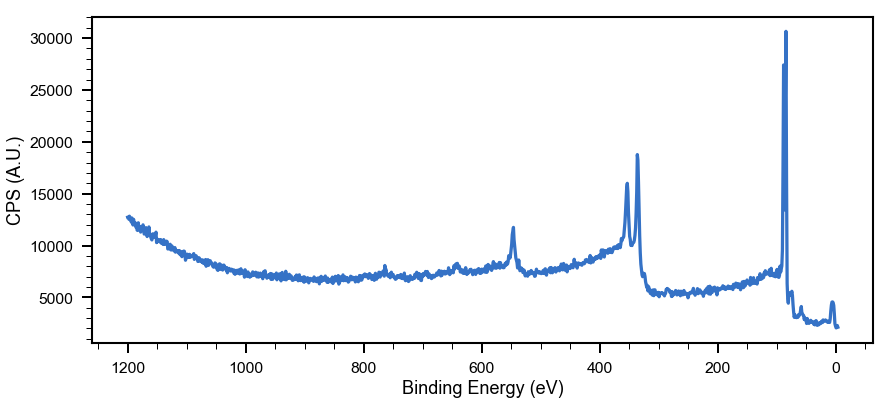

In [132]:
fig = plt.figure(figsize=(14, 6))
plot_region(xp, 'overview')
plt.gca().set(xlabel='Binding Energy (eV)', ylabel='CPS (A.U.)')
plt.gca().get_legend().remove()
plt.savefig('/Users/pabloherrero/Nextcloud/thesis/ch6/xps_spectrum.png', dpi=200)